In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [6]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data()

In [7]:
X_train=X_train.astype('float32')/255.0
X_test=X_test.astype('float32')/255.0

In [8]:
X_val, y_val = X_train[50000:], y_train[50000:]
X_train, y_train = X_train[:50000], y_train[:50000]

In [9]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(256,activation='relu',kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(10, activation='softmax')
])

c:\Users\vaibh\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [11]:
checkpoint = ModelCheckpoint(filepath="best_model.h5",
                            monitor="val_loss",save_best_only=True,mode="min",verbose=1)

In [12]:
es = EarlyStopping(monitor="val_loss",
                   patience=5,restore_best_weights=True)

In [13]:
lr_scheduler = ReduceLROnPlateau(monitor="val_loss",
                                 factor=0.5,patience=2,verbose=1)

In [14]:
history=model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=50,batch_size=64,verbose=1,callbacks=[checkpoint,es,lr_scheduler])

Epoch 1/50
774/782 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7644 - loss: 1.1897
Epoch 1: val_loss improved from None to 0.44049, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8621 - loss: 0.8328 - val_accuracy: 0.9570 - val_loss: 0.4405 - learning_rate: 0.0010
Epoch 2/50
779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9263 - loss: 0.5231
Epoch 2: val_loss improved from 0.44049 to 0.34769, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9287 - loss: 0.5030 - val_accuracy: 0.9625 - val_loss: 0.3477 - learning_rate: 0.0010
Epoch 3/50
776/782 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9383 - loss: 0.4276
Epoch 3: val_loss improved from 0.34769 to 0.29120, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9393 - loss: 0.4115 - val_accuracy: 0.9684 - val_loss: 0.2912 - learning_rate: 0.0010
Epoch 4/50
780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9435 - loss: 0.3711
Epoch 4: val_loss improved from 0.29120 to 0.26311, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9444 - loss: 0.3627 - val_accuracy: 0.9701 - val_loss: 0.2631 - learning_rate: 0.0010
Epoch 5/50
780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9488 - loss: 0.3340
Epoch 5: val_loss did not improve from 0.26311
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9480 - loss: 0.3383 - val_accuracy: 0.9661 - val_loss: 0.2672 - learning_rate: 0.0010
Epoch 6/50
779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9507 - loss: 0.3258
Epoch 6: val_loss improved from 0.26311 to 0.24318, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9490 - loss: 0.3270 - val_accuracy: 0.9720 - val_loss: 0.2432 - learning_rate: 0.0010
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9529 - loss: 0.3084
Epoch 7: val_loss improved from 0.24318 to 0.23254, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9521 - loss: 0.3103 - val_accuracy: 0.9726 - val_loss: 0.2325 - learning_rate: 0.0010
Epoch 8/50
779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9528 - loss: 0.3001
Epoch 8: val_loss did not improve from 0.23254
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9512 - loss: 0.3055 - val_accuracy: 0.9701 - val_loss: 0.2381 - learning_rate: 0.0010
Epoch 9/50
780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9552 - loss: 0.2937
Epoch 9: val_loss improved from 0.23254 to 0.23049, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9528 - loss: 0.3026 - val_accuracy: 0.9725 - val_loss: 0.2305 - learning_rate: 0.0010
Epoch 10/50
779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9555 - loss: 0.2888
Epoch 10: val_loss improved from 0.23049 to 0.22674, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9541 - loss: 0.2957 - val_accuracy: 0.9714 - val_loss: 0.2267 - learning_rate: 0.0010
Epoch 11/50
776/782 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9569 - loss: 0.2821
Epoch 11: val_loss did not improve from 0.22674
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9531 - loss: 0.2934 - val_accuracy: 0.9670 - val_loss: 0.2384 - learning_rate: 0.0010
Epoch 12/50
778/782 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9510 - loss: 0.2961
Epoch 12: val_loss did not improve from 0.22674

Epoch 12: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9535 - loss: 0.2905 - val_accuracy: 0.9670 - val_loss: 0.2454 - learning_rate: 0.0010
Epoch 13/50
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9606 - loss: 0.2553
Epoch 13: val_loss improved from 0.22674 to 0.18578, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9622 - loss: 0.2453 - val_accuracy: 0.9768 - val_loss: 0.1858 - learning_rate: 5.0000e-04
Epoch 14/50
775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9676 - loss: 0.2170
Epoch 14: val_loss improved from 0.18578 to 0.18058, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9652 - loss: 0.2221 - val_accuracy: 0.9756 - val_loss: 0.1806 - learning_rate: 5.0000e-04
Epoch 15/50
780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9670 - loss: 0.2088
Epoch 15: val_loss improved from 0.18058 to 0.17106, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9666 - loss: 0.2095 - val_accuracy: 0.9775 - val_loss: 0.1711 - learning_rate: 5.0000e-04
Epoch 16/50
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9658 - loss: 0.2041
Epoch 16: val_loss did not improve from 0.17106
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9650 - loss: 0.2069 - val_accuracy: 0.9744 - val_loss: 0.1760 - learning_rate: 5.0000e-04
Epoch 17/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9658 - loss: 0.2006
Epoch 17: val_loss improved from 0.17106 to 0.16159, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9656 - loss: 0.2010 - val_accuracy: 0.9778 - val_loss: 0.1616 - learning_rate: 5.0000e-04
Epoch 18/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9691 - loss: 0.1873
Epoch 18: val_loss did not improve from 0.16159
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9674 - loss: 0.1963 - val_accuracy: 0.9758 - val_loss: 0.1672 - learning_rate: 5.0000e-04
Epoch 19/50
779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9666 - loss: 0.1928
Epoch 19: val_loss did not improve from 0.16159

Epoch 19: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9669 - loss: 0.1939 - val_accuracy: 0.9773 - val_loss: 0.1617 - learning_rate: 5.0000e-04
Epoch 20/50
779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9722 - loss: 0.1731
Epoch 20: val_loss improved from 0.16159 to 0.14195, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9734 - loss: 0.1676 - val_accuracy: 0.9818 - val_loss: 0.1420 - learning_rate: 2.5000e-04
Epoch 21/50
779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9757 - loss: 0.1545
Epoch 21: val_loss improved from 0.14195 to 0.13969, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9749 - loss: 0.1554 - val_accuracy: 0.9800 - val_loss: 0.1397 - learning_rate: 2.5000e-04
Epoch 22/50
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9759 - loss: 0.1482
Epoch 22: val_loss improved from 0.13969 to 0.13562, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9758 - loss: 0.1485 - val_accuracy: 0.9805 - val_loss: 0.1356 - learning_rate: 2.5000e-04
Epoch 23/50
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9783 - loss: 0.1382
Epoch 23: val_loss improved from 0.13562 to 0.12879, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9772 - loss: 0.1427 - val_accuracy: 0.9822 - val_loss: 0.1288 - learning_rate: 2.5000e-04
Epoch 24/50
776/782 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9770 - loss: 0.1423
Epoch 24: val_loss did not improve from 0.12879
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9771 - loss: 0.1388 - val_accuracy: 0.9777 - val_loss: 0.1426 - learning_rate: 2.5000e-04
Epoch 25/50
775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9773 - loss: 0.1365
Epoch 25: val_loss did not improve from 0.12879

Epoch 25: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9768 - loss: 0.1363 - val_accuracy: 0.9810 - val_loss: 0.1302 - learning_rate: 2.5000e-04
Epoch 26/50
775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9801 - loss: 0.1250
Epoch 26: val_loss improved from 0.12879 to 0.12179, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9809 - loss: 0.1220 - val_accuracy: 0.9825 - val_loss: 0.1218 - learning_rate: 1.2500e-04
Epoch 27/50
777/782 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9826 - loss: 0.1168
Epoch 27: val_loss improved from 0.12179 to 0.11898, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9826 - loss: 0.1159 - val_accuracy: 0.9827 - val_loss: 0.1190 - learning_rate: 1.2500e-04
Epoch 28/50
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9830 - loss: 0.1105
Epoch 28: val_loss improved from 0.11898 to 0.11681, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9826 - loss: 0.1126 - val_accuracy: 0.9834 - val_loss: 0.1168 - learning_rate: 1.2500e-04
Epoch 29/50
775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9837 - loss: 0.1087
Epoch 29: val_loss improved from 0.11681 to 0.11418, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9833 - loss: 0.1088 - val_accuracy: 0.9837 - val_loss: 0.1142 - learning_rate: 1.2500e-04
Epoch 30/50
777/782 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9835 - loss: 0.1046
Epoch 30: val_loss improved from 0.11418 to 0.11267, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9834 - loss: 0.1040 - val_accuracy: 0.9837 - val_loss: 0.1127 - learning_rate: 1.2500e-04
Epoch 31/50
780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9847 - loss: 0.1008
Epoch 31: val_loss improved from 0.11267 to 0.11084, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9845 - loss: 0.1010 - val_accuracy: 0.9839 - val_loss: 0.1108 - learning_rate: 1.2500e-04
Epoch 32/50
771/782 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9838 - loss: 0.1015
Epoch 32: val_loss did not improve from 0.11084
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9838 - loss: 0.1011 - val_accuracy: 0.9848 - val_loss: 0.1113 - learning_rate: 1.2500e-04
Epoch 33/50
778/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9851 - loss: 0.0938
Epoch 33: val_loss did not improve from 0.11084

Epoch 33: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9847 - loss: 0.0973 - val_accuracy: 0.9837 - val_loss: 0.1127 - learning_rate: 1.2500e-04
Epoch 34/50
771/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9856 - loss: 0.0928
Epoch 34: val_loss did not improve from 0.11084
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9862 - loss: 0.0909 - val_ac

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9871 - loss: 0.0878 - val_accuracy: 0.9841 - val_loss: 0.1081 - learning_rate: 6.2500e-05
Epoch 36/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9872 - loss: 0.0852
Epoch 36: val_loss did not improve from 0.10815
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9871 - loss: 0.0858 - val_accuracy: 0.9843 - val_loss: 0.1087 - learning_rate: 6.2500e-05
Epoch 37/50
771/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9878 - loss: 0.0841
Epoch 37: val_loss did not improve from 0.10815

Epoch 37: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9874 - loss: 0.0839 - val_accuracy: 0.9840 - val_loss: 0.1088 - learning_rate: 6.2500e-05
Epoch 38/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9884 - loss: 0.0819
Epoch 38: val_loss improved from 0.10815 to 0.10559, saving model to best_model.h5


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9883 - loss: 0.0812 - val_accuracy: 0.9842 - val_loss: 0.1056 - learning_rate: 3.1250e-05
Epoch 39/50
779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9902 - loss: 0.0767
Epoch 39: val_loss did not improve from 0.10559
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9898 - loss: 0.0769 - val_accuracy: 0.9848 - val_loss: 0.1073 - learning_rate: 3.1250e-05
Epoch 40/50
771/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9898 - loss: 0.0766
Epoch 40: val_loss did not improve from 0.10559

Epoch 40: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9895 - loss: 0.0762 - val_accuracy: 0.9849 - val_loss: 0.1057 - learning_rate: 3.1250e-05
Epoch 41/50
778/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9896 - loss: 0.0755
Epoch 41: val_loss did not improve from 0.10559
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9901 - loss: 0.0739 - val_

In [15]:
loss,acc=model.evaluate(X_test,y_test,verbose=2)
print(f"Test Accuracy: {acc:.4f}, Test Loss: {loss:.4f}")

313/313 - 0s - 1ms/step - accuracy: 0.9848 - loss: 0.0941
Test Accuracy: 0.9848, Test Loss: 0.0941


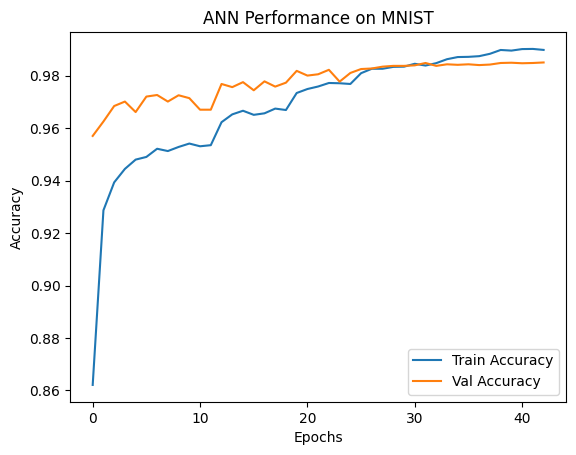

In [16]:
plt.plot(history.history["accuracy"],label="Train Accuracy")
plt.plot(history.history["val_accuracy"],label="Val Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("ANN Performance on MNIST")
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


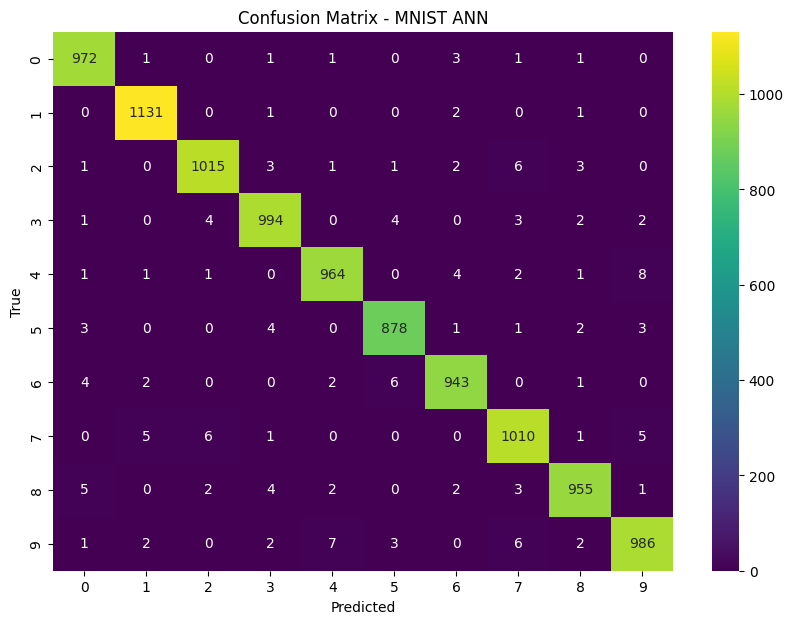

In [17]:
y_pred = model.predict(X_test)
y_pred_classes=np.argmax(y_pred, axis=1)

cm=confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - MNIST ANN")
plt.show()

In [18]:
print("\nClassificatipon Report: \n")
print(classification_report(y_test, y_pred_classes))


Classificatipon Report: 

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



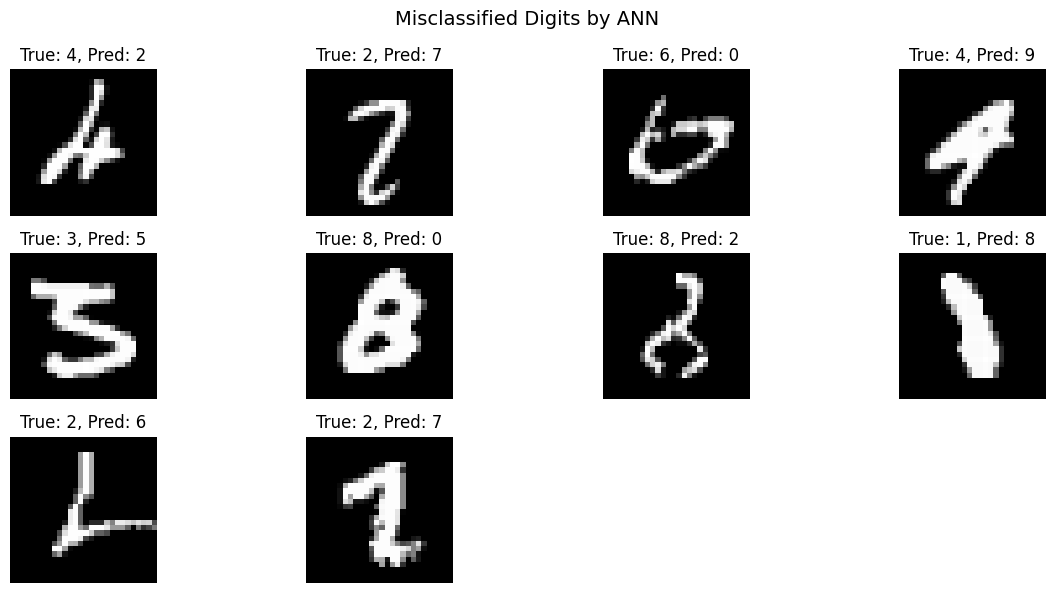

In [19]:
misclassified_idx = np.where(y_pred_classes != y_test)[0]

plt.figure(figsize=(12, 6))
for i, idx in enumerate(misclassified_idx[:10]):
    plt.subplot(3, 4, i + 1)
    plt.imshow(X_test[idx].squeeze(), cmap="gray")
    
    plt.title(f"True: {y_test[idx]}, Pred: {y_pred_classes[idx]}")
    plt.axis("off")

plt.suptitle("Misclassified Digits by ANN", fontsize=14)
plt.tight_layout()
plt.show()